In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


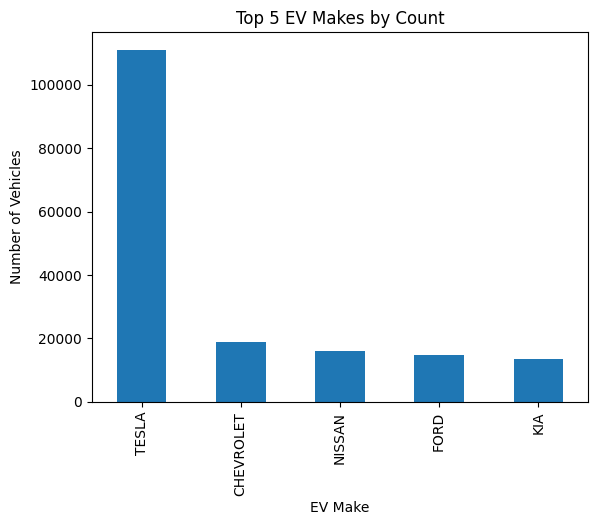

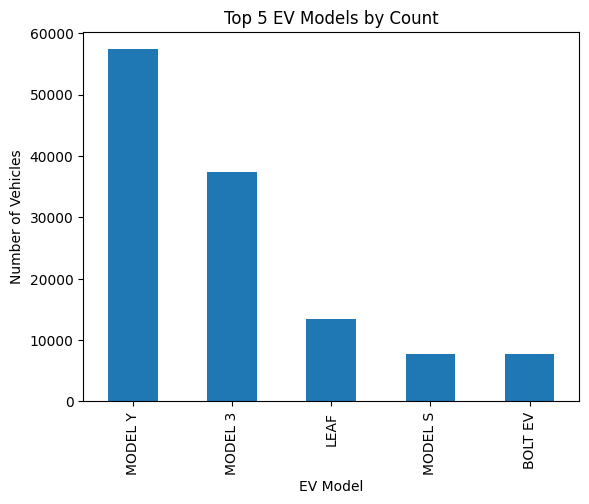

In [11]:
#Create a bar chart showing the top 5 EV makes and models by count.
# Top 5 EV Makes
df['Make'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 EV Makes by Count")
plt.xlabel("EV Make")
plt.ylabel("Number of Vehicles")
plt.show()

# Top 5 EV Models
df['Model'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 EV Models by Count")
plt.xlabel("EV Model")
plt.ylabel("Number of Vehicles")
plt.show()



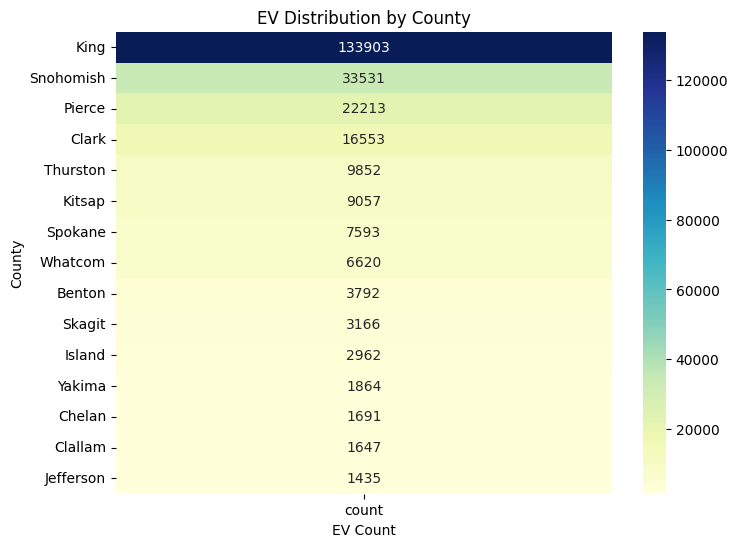

In [12]:

#Use a heatmap or choropleth map to visualize EV distribution by county.
county_counts = df['County'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.heatmap(county_counts.to_frame(), annot=True, cmap="YlGnBu", fmt='d')
plt.title("EV Distribution by County")
plt.ylabel("County")
plt.xlabel("EV Count")
plt.show()


Darker colors represent counties with more EV registrations.King County shows the highest concentration of EVs.

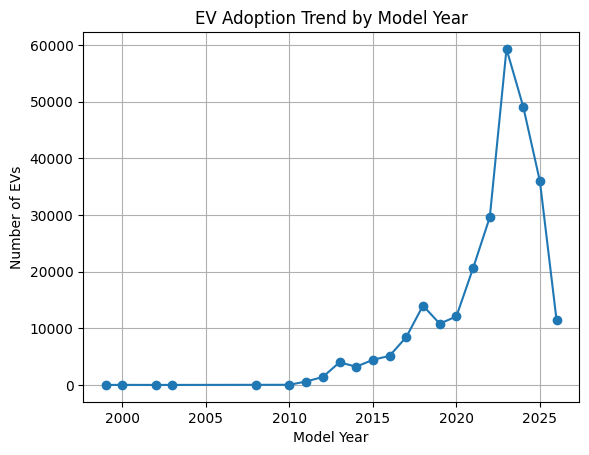

In [13]:

#Create a line graph showing the trend of EV adoption by model year.
df.groupby('Model Year').size().plot(kind='line', marker='o')
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.grid(True)
plt.show()



---EV adoption increases significantly after 2018.Recent years show rapid growth, reflecting policy support and technology improvement.

In [ ]:
#Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.
plt.scatter(df['Base MSRP'], df['Electric Range'])
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Electric Range (miles)")
plt.show()


KeyError: 'Base MSRP'

---Scatter plots show relationships between two numeric variables.A positive trend is observed: higher-priced EVs tend to have higher range.Some variation exists due to different vehicle technologies.

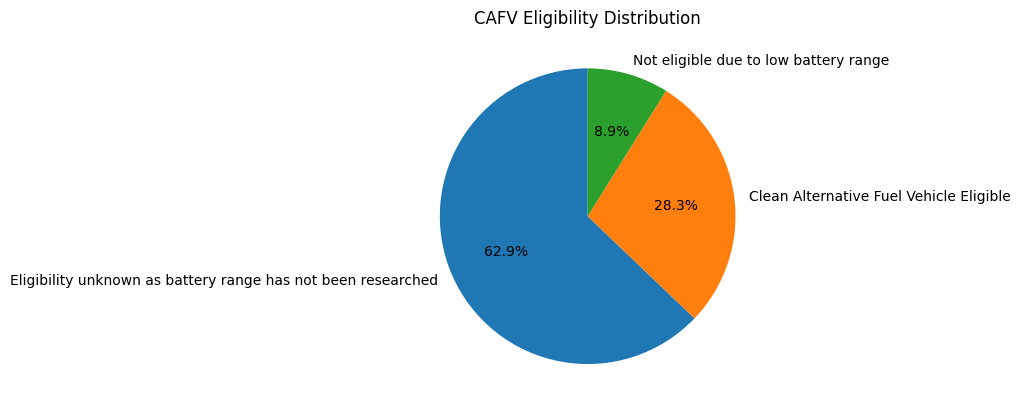

In [ ]:
#Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] \
.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()

---A large portion of EVs are CAFV eligible, meaning they qualify for clean fuel incentives.This shows the positive impact of environmental policies.

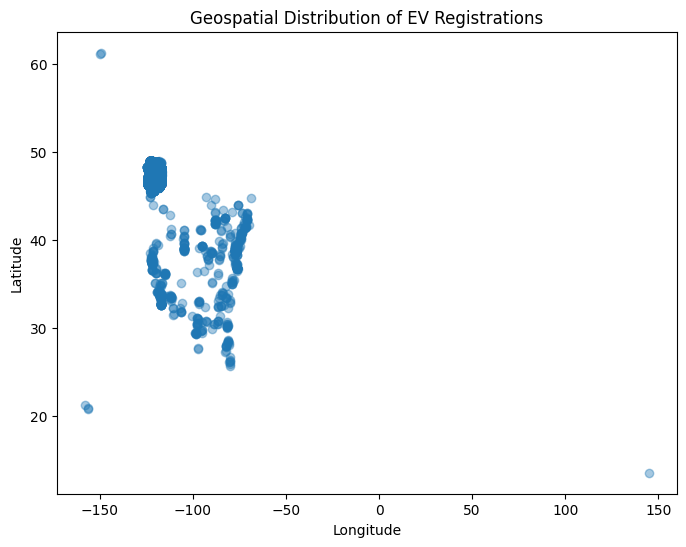

In [19]:
#Use a geospatial map to display EV registrations based on vehicle location.

df[['Longitude','Latitude']] = df['Vehicle Location'] \
    .str.replace('POINT \\(|\\)', '', regex=True) \
    .str.split(' ', expand=True)

df[['Longitude','Latitude']] = df[['Longitude','Latitude']].astype(float)

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.4)
plt.title("Geospatial Distribution of EV Registrations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()